# Лабораторная работа #3
# Выполнил: 6131-010402D Соколов Роман Александрович

In [1]:
import pandas as pd
import numpy as np
import sklearn

# Binary-class dataset

In [2]:
df1 = pd.read_csv('biclass/webtoon_originals_en.csv')
df1.head(2)

,title_id,title,genre,authors,weekdays,length,subscribers,rating,views,likes,status,daily_pass,synopsis
0,3923,Island,ACTION,"Inwan Youn,Kyungil Yang",SUNDAY,6,34748,8.95,182133,17902,ONGOING,True,“I’ll offer you 50 million won for every demon...
1,3922,Deadlife,ACTION,"Hooressha,Jinguk Lim",SUNDAY,6,89644,9.34,796712,81830,ONGOING,True,"Am I dead, or am I alive? After Seong-hun gets..."


# Multiclass dataset

In [3]:
df2 = pd.read_csv('multiclass/gran_turismo_gt6.csv')
df2.head(2)

,brand,model,car_type,img_url,price,drive,hp,weight,torque,w_kg
0,AC Cars,427 S/C '66,Street,https://www.kudosprime.com/gt6/images/cars/gt6...,423200.0,FR,478.0,1311.0,651.0,272 to ? W/Kg
1,AEM,S2000,Tuned,https://www.kudosprime.com/gt6/images/cars/gt6...,100000.0,FR,430.0,1155.0,495.0,278 to 345 W/Kg


# Задание - 1. Многоклассовая классификация

## Задание 1.1. На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df2_copy = df2.copy()

In [7]:
for i in range(df2_copy.shape[0]):
    if df2_copy['car_type'][i] == 'Street':
        df2_copy['car_type'][i] = 0
    elif df2_copy['car_type'][i] == 'Race':
        df2_copy['car_type'][i] = 1
    elif df2_copy['car_type'][i] == 'Tuned':
        df2_copy['car_type'][i] = 2

C:\Users\rsoko\AppData\Local\Temp\ipykernel_14596\907754367.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_copy['car_type'][i] = 1
C:\Users\rsoko\AppData\Local\Temp\ipykernel_14596\907754367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_copy['car_type'][i] = 0
C:\Users\rsoko\AppData\Local\Temp\ipykernel_14596\907754367.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_copy['car_type'][i] = 2


In [8]:
df2_copy.head(2)

,brand,model,car_type,img_url,price,drive,hp,weight,torque,w_kg
0,AC Cars,427 S/C '66,0,https://www.kudosprime.com/gt6/images/cars/gt6...,423200.0,FR,478.0,1311.0,651.0,272 to ? W/Kg
1,AEM,S2000,2,https://www.kudosprime.com/gt6/images/cars/gt6...,100000.0,FR,430.0,1155.0,495.0,278 to 345 W/Kg


In [9]:
df2_copy = df2_copy.dropna()

In [10]:
df2_copy['car_type'].value_counts()

0    818
1    187
2     26
Name: car_type, dtype: int64

In [11]:
def df2_counts(arr):
    arr_types = arr['car_type'].value_counts()
    arr_types_arr = arr_types.values
    return arr_types_arr.shape[0]

In [12]:
model1 = KNeighborsClassifier(n_neighbors=df2_counts(df2_copy))

In [13]:
x_train = df2_copy.iloc[0:round(df2_copy.shape[0]*0.3), [-2, -3, -4]]
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   torque  309 non-null    float64
 1   weight  309 non-null    float64
 2   hp      309 non-null    float64
dtypes: float64(3)
memory usage: 9.7 KB


In [14]:
y_train = df2_copy['car_type'].iloc[0:round(df2_copy.shape[0]*0.3)]
y_train = y_train.astype('int')

In [15]:
x_test = df2_copy.iloc[round(df2_copy.shape[0]*0.3):, [-2, -3, -4]]
x_test.head(2)

,torque,weight,hp
417,218.0,1240.0,246.0
419,218.0,1260.0,246.0


In [16]:
y_test = df2_copy['car_type'].iloc[round(df2_copy.shape[0]*0.3):]
y_test = y_test.astype('int')

In [17]:
model1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
pred = model1.predict(x_test)

In [19]:
def check(arr1, arr2):
    score = 0
    for i in range(arr1.shape[0]):
        if arr1[i] == arr2[i]:
            score += 1
    return print(str(score/arr1.shape[0]*100)[:4], '%')

In [20]:
check(pred, y_test.to_numpy())

89.4 %


## Задание 1.2. То же самое с использованием кросс-валидации 

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
x = np.concatenate((x_train, x_test))

In [23]:
y = np.concatenate((y_train, y_test))
y

array([0, 2, 0, ..., 0, 0, 0])

In [24]:
cvl = cross_val_score(model1, x, y)
cvl

array([0.85024155, 0.93203883, 0.89320388, 0.90291262, 0.87378641])

## Задание 1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

In [25]:
results = dict()
for i in range(2, 30):  
    model_lead = KNeighborsClassifier(leaf_size=i)
    model_lead.fit(x_train, y_train)
    pred_lead = model_lead.predict(x_test)
    results[i] = pred_lead
    

In [26]:
keys = results.keys()
keys

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [27]:
accs = []
for i in range(2, len(keys)+2):
    acc = sklearn.metrics.accuracy_score(y_test, results[i])
    accs.append(acc)
    

In [28]:
from matplotlib import pyplot as plt

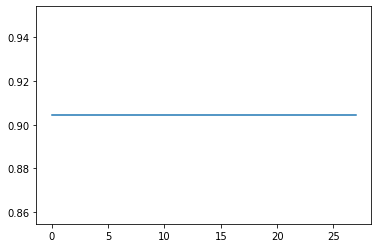

In [29]:
plt.plot(accs)

## Задание 1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test, pred)

array([[547,  29,   1],
       [ 28,  99,   0],
       [ 15,   3,   0]], dtype=int64)

# Задание 2. На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить classification_report

In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
df1_copy = df1.copy()
df1_copy.head(2)

,title_id,title,genre,authors,weekdays,length,subscribers,rating,views,likes,status,daily_pass,synopsis
0,3923,Island,ACTION,"Inwan Youn,Kyungil Yang",SUNDAY,6,34748,8.95,182133,17902,ONGOING,True,“I’ll offer you 50 million won for every demon...
1,3922,Deadlife,ACTION,"Hooressha,Jinguk Lim",SUNDAY,6,89644,9.34,796712,81830,ONGOING,True,"Am I dead, or am I alive? After Seong-hun gets..."


In [205]:
def to1_0(arr):
    for i in range(arr.shape[0]):
        if arr['daily_pass'][i] == True:
            arr['daily_pass'][i] = int(1)
        elif arr['daily_pass'][i] == False:
            arr['daily_pass'][i] = int(0)

In [206]:
to1_0(df1_copy)

C:\Users\rsoko\AppData\Local\Temp\ipykernel_14596\3209197165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr['daily_pass'][i] = int(1)


In [207]:
df1_copy.head(2)

,title_id,title,genre,authors,weekdays,length,subscribers,rating,views,likes,status,daily_pass,synopsis
0,3923,Island,ACTION,"Inwan Youn,Kyungil Yang",SUNDAY,6,34748,8.95,182133,17902,ONGOING,1,“I’ll offer you 50 million won for every demon...
1,3922,Deadlife,ACTION,"Hooressha,Jinguk Lim",SUNDAY,6,89644,9.34,796712,81830,ONGOING,1,"Am I dead, or am I alive? After Seong-hun gets..."


In [262]:
for_model = df1_copy.iloc[0:, [5, 6, 7, 8, 9, 11]]
#new
for_model['subscribers'] = for_model['subscribers']/for_model['subscribers'].max()
for_model['views'] = for_model['views']/for_model['views'].max()
for_model['likes'] = for_model['likes']/for_model['likes'].max()
for_model['rating'] = for_model['rating']/10
for_model 

,length,subscribers,rating,views,likes,daily_pass
0,6,0.004995,0.895,0.000179,0.000322,1
1,6,0.012887,0.934,0.000782,0.001473,1
2,4,0.015509,0.902,0.000448,0.000834,0
3,5,0.048007,0.969,0.001652,0.003595,0
4,6,0.031390,0.838,0.004286,0.006675,1
...,...,...,...,...,...,...
670,352,0.106938,0.965,0.140616,0.155075,0
671,170,0.013125,0.931,0.004506,0.002909,0
672,532,0.364289,0.970,0.684894,0.480459,0
673,17,0.065489,0.966,0.064916,0.050850,1


In [263]:
train = for_model.iloc[0:round(for_model.shape[0]*0.5), [0, 1, 2, 3, 4, 5]]
train

,length,subscribers,rating,views,likes,daily_pass
0,6,0.004995,0.895,0.000179,0.000322,1
1,6,0.012887,0.934,0.000782,0.001473,1
2,4,0.015509,0.902,0.000448,0.000834,0
3,5,0.048007,0.969,0.001652,0.003595,0
4,6,0.031390,0.838,0.004286,0.006675,1
...,...,...,...,...,...,...
333,108,0.087705,0.971,0.036197,0.100811,0
334,41,0.013112,0.955,0.001727,0.005432,0
335,9,0.052609,0.960,0.013070,0.026312,1
336,59,0.093968,0.964,0.029517,0.052494,0


In [264]:
test = for_model.iloc[round(for_model.shape[0]*0.5):, [0, 1, 2, 3, 4, 5]]
test

,length,subscribers,rating,views,likes,daily_pass
338,27,0.009954,0.969,0.001235,0.002716,0
339,95,0.034995,0.953,0.006967,0.019006,0
340,83,0.355437,0.982,0.215048,0.203550,0
341,96,0.060587,0.966,0.021026,0.040822,0
342,123,0.078660,0.959,0.033346,0.059981,0
...,...,...,...,...,...,...
670,352,0.106938,0.965,0.140616,0.155075,0
671,170,0.013125,0.931,0.004506,0.002909,0
672,532,0.364289,0.970,0.684894,0.480459,0
673,17,0.065489,0.966,0.064916,0.050850,1


In [265]:
x_train2 = train.iloc[0:, [0, 1, 2, 3, 4]]
x_train2

,length,subscribers,rating,views,likes
0,6,0.004995,0.895,0.000179,0.000322
1,6,0.012887,0.934,0.000782,0.001473
2,4,0.015509,0.902,0.000448,0.000834
3,5,0.048007,0.969,0.001652,0.003595
4,6,0.031390,0.838,0.004286,0.006675
...,...,...,...,...,...
333,108,0.087705,0.971,0.036197,0.100811
334,41,0.013112,0.955,0.001727,0.005432
335,9,0.052609,0.960,0.013070,0.026312
336,59,0.093968,0.964,0.029517,0.052494


In [266]:
y_train2 = train.iloc[0:, [-1]]
y_train2 = y_train2.astype(np.int64)
y_train2

,daily_pass
0,1
1,1
2,0
3,0
4,1
...,...
333,0
334,0
335,1
336,0


In [267]:
x_test2 = test.iloc[0:, [0, 1, 2, 3, 4]]
x_test2

,length,subscribers,rating,views,likes
338,27,0.009954,0.969,0.001235,0.002716
339,95,0.034995,0.953,0.006967,0.019006
340,83,0.355437,0.982,0.215048,0.203550
341,96,0.060587,0.966,0.021026,0.040822
342,123,0.078660,0.959,0.033346,0.059981
...,...,...,...,...,...
670,352,0.106938,0.965,0.140616,0.155075
671,170,0.013125,0.931,0.004506,0.002909
672,532,0.364289,0.970,0.684894,0.480459
673,17,0.065489,0.966,0.064916,0.050850


In [370]:
y_test2 = test.iloc[0:, [-1]]
y_test2 = y_test2.astype(np.int64)
y_test2.head(2)

,daily_pass
338,0
339,0


In [269]:
model2 = LogisticRegression()

In [270]:
model2.fit(X=x_train2, y=np.ravel(y_train2))

LogisticRegression()

In [271]:
pred2 = model2.predict(x_test2)

### Accuracy score 

In [273]:
sklearn.metrics.accuracy_score(y_test2, pred2)

0.857566765578635

### Precision score 

In [274]:
sklearn.metrics.precision_score(y_test2, pred2)

0.8181818181818182

### Recall score 

In [275]:
sklearn.metrics.recall_score(y_test2, pred2)

0.16363636363636364

### F1 score 

In [276]:
sklearn.metrics.f1_score(y_test2, pred2)

0.2727272727272727

In [277]:
print(sklearn.metrics.classification_report(y_test2, pred2))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       282
           1       0.82      0.16      0.27        55

    accuracy                           0.86       337
   macro avg       0.84      0.58      0.60       337
weighted avg       0.85      0.86      0.82       337



# Задание 3. Использование нормализации признаков В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (StandardScalerили MinMaxScaler). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [339]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [352]:
ss = StandardScaler()
MMs = MinMaxScaler()

## 1. Бинарная классификация 

In [353]:
scal_list = ['length', 'subscribers', 'rating', 'views', 'likes']

In [354]:
for_model[['length', 'views', 'rating', 'views', 'likes']]

,length,views,rating,views,likes
0,6,0.000179,0.895,0.000179,0.000322
1,6,0.000782,0.934,0.000782,0.001473
2,4,0.000448,0.902,0.000448,0.000834
3,5,0.001652,0.969,0.001652,0.003595
4,6,0.004286,0.838,0.004286,0.006675
...,...,...,...,...,...
670,352,0.140616,0.965,0.140616,0.155075
671,170,0.004506,0.931,0.004506,0.002909
672,532,0.684894,0.970,0.684894,0.480459
673,17,0.064916,0.966,0.064916,0.050850


## StandardScaler() 

In [355]:
ss.fit(for_model[['length', 'views', 'rating', 'views', 'likes']])

StandardScaler()

In [356]:
for_model_new = ss.transform(for_model[['length', 'views', 'rating', 'views', 'likes']])

In [357]:
for_model_new = pd.DataFrame(for_model_new, columns=scal_list)
for_model_new

,length,subscribers,rating,views,likes
0,-0.609106,-0.395674,-0.814873,-0.395674,-0.491642
1,-0.609106,-0.390036,-0.120244,-0.390036,-0.481861
2,-0.624705,-0.393159,-0.690196,-0.393159,-0.487296
3,-0.616906,-0.381905,0.503141,-0.381905,-0.463837
4,-0.609106,-0.357278,-1.830099,-0.357278,-0.437663
...,...,...,...,...,...
670,2.089393,0.917281,0.431897,0.917281,0.823274
671,0.669951,-0.355217,-0.173677,-0.355217,-0.469664
672,3.493237,6.005755,0.520952,6.005755,3.588025
673,-0.523316,0.209562,0.449708,0.209562,-0.062315


In [358]:
model_new = LogisticRegression()

In [360]:
model_new.fit(for_model_new[0:round(for_model_new.shape[0]*0.5)], np.ravel(y_train2))

LogisticRegression()

In [361]:
pred_new = model_new.predict(x_test2)

In [362]:
sklearn.metrics.accuracy_score(y_test2, pred_new)

0.8367952522255193

## MinMaxScaler() 

In [363]:
MMs.fit(for_model[['length', 'views', 'rating', 'views', 'likes']])

MinMaxScaler()

In [364]:
for_model_new2 = MMs.transform(for_model[['length', 'views', 'rating', 'views', 'likes']])

In [365]:
for_model_new2 = pd.DataFrame(for_model_new2, columns=scal_list)
for_model_new2

,length,subscribers,rating,views,likes
0,0.003687,0.000096,0.779736,0.000096,0.000169
1,0.003687,0.000699,0.865639,0.000699,0.001321
2,0.002212,0.000365,0.795154,0.000365,0.000681
3,0.002950,0.001569,0.942731,0.001569,0.003442
4,0.003687,0.004203,0.654185,0.004203,0.006523
...,...,...,...,...,...
670,0.258850,0.140545,0.933921,0.140545,0.154946
671,0.124631,0.004424,0.859031,0.004424,0.002756
672,0.391593,0.684868,0.944934,0.684868,0.480379
673,0.011799,0.064839,0.936123,0.064839,0.050705


In [366]:
model_new2 = LogisticRegression()

In [367]:
model_new2.fit(for_model_new2[0:round(for_model_new2.shape[0]*0.5)], np.ravel(y_train2))

LogisticRegression()

In [368]:
pred_new2 = model_new2.predict(x_test2)

In [369]:
sklearn.metrics.accuracy_score(y_test2, pred_new)

0.8367952522255193

## 2. Многоклассовая классификация 

In [404]:
for_model3 = df2_copy.copy()

In [405]:
for_model3.head(2)

,brand,model,car_type,img_url,price,drive,hp,weight,torque,w_kg
0,AC Cars,427 S/C '66,0,https://www.kudosprime.com/gt6/images/cars/gt6...,423200.0,FR,478.0,1311.0,651.0,272 to ? W/Kg
1,AEM,S2000,2,https://www.kudosprime.com/gt6/images/cars/gt6...,100000.0,FR,430.0,1155.0,495.0,278 to 345 W/Kg


In [406]:
list2 = ['hp', 'weight', 'torque']

### StandardScaler() 

In [407]:
ss.fit(for_model3[list2])

StandardScaler()

In [409]:
for_model_new3 = ss.transform(for_model3[list2])
for_model_new3 = pd.DataFrame(for_model_new3, columns=list2)
for_model_new3 = for_model_new3.reindex()
for_model_new3

,hp,weight,torque
0,1.035288,0.204511,1.319317
1,0.766159,-0.296048,0.607874
2,-0.899076,-0.681093,-0.828695
3,-0.786939,-0.023308,-0.600668
4,-0.187006,1.106159,-0.213023
...,...,...,...
1026,-0.231860,0.522173,-0.144614
1027,1.573545,0.169215,1.177940
1028,-0.932717,2.062355,-0.783089
1029,-0.372032,0.586348,-0.194780


In [433]:
y3 = for_model3['car_type'].reindex()
y3 = y3.astype(np.int32)
y3

0       0
1       2
3       0
4       0
5       0
       ..
1265    0
1266    0
1267    0
1268    0
1269    0
Name: car_type, Length: 1031, dtype: int32

In [430]:
model3 = KNeighborsClassifier(n_neighbors=df2_counts(df2_copy))

In [435]:
model3.fit(for_model_new3[:round(for_model_new3.shape[0]*0.5)], y3[:round(for_model_new3.shape[0]*0.5)])

KNeighborsClassifier(n_neighbors=3)

In [439]:
pred3 = model3.predict(for_model_new3[round(for_model_new3.shape[0]*0.5):])

In [440]:
sklearn.metrics.accuracy_score(y3[round(for_model_new3.shape[0]*0.5):], pred3)

0.8718446601941747

### MinMaxScaler() 

In [441]:
MMs.fit(for_model3[list2])

MinMaxScaler()

In [442]:
for_model_new4 = ss.transform(for_model3[list2])
for_model_new4 = pd.DataFrame(for_model_new4, columns=list2)
for_model_new4 = for_model_new4.reindex()
for_model_new4

,hp,weight,torque
0,1.035288,0.204511,1.319317
1,0.766159,-0.296048,0.607874
2,-0.899076,-0.681093,-0.828695
3,-0.786939,-0.023308,-0.600668
4,-0.187006,1.106159,-0.213023
...,...,...,...
1026,-0.231860,0.522173,-0.144614
1027,1.573545,0.169215,1.177940
1028,-0.932717,2.062355,-0.783089
1029,-0.372032,0.586348,-0.194780


In [444]:
y4 = for_model3['car_type'].reindex()
y4 = y4.astype(np.int32)
y4

0       0
1       2
3       0
4       0
5       0
       ..
1265    0
1266    0
1267    0
1268    0
1269    0
Name: car_type, Length: 1031, dtype: int32

In [445]:
model4 = KNeighborsClassifier(n_neighbors=df2_counts(df2_copy))

In [446]:
model4.fit(for_model_new4[:round(for_model_new4.shape[0]*0.5)], y4[:round(for_model_new4.shape[0]*0.5)])

KNeighborsClassifier(n_neighbors=3)

In [447]:
pred4 = model4.predict(for_model_new4[round(for_model_new4.shape[0]*0.5):])

In [448]:
sklearn.metrics.accuracy_score(y4[round(for_model_new4.shape[0]*0.5):], pred4)

0.8718446601941747